In [8]:
import os
import numpy as np
import json
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd 

In [9]:
#Import data
data_path = "./Annotations/train.json"
with open(data_path) as f:
    data = json.load(f)
questions = []
for qa in data:
    questions.append(qa["question"])

1. Number of repeating questions is 11165 out of a total of 20523, which is 54.4% 

2. The top 5 common questions with count are: [('What is this?', 2721), ('What color is this?', 367), ('What is it?', 255), ('What is this item?', 242), ('What does this say?', 199)] 

Below is a plot of the question counts.


Text(0.5, 0, 'question')

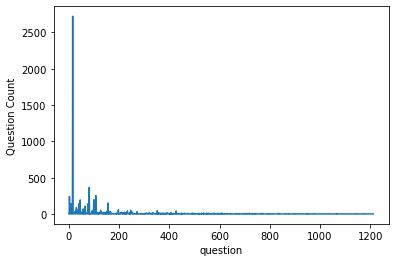

In [10]:
#Analysis 1: sentence-level statistics
q_num = len(questions)
counter = Counter(questions)

# number of repeating questions
repeat_questions = Counter({x: count for x, count in counter.items() if count > 1})
repeat_questions_cnt = sum([count for count in repeat_questions.values()])
print("1. Number of repeating questions is {} out of a total of {}, which is {}% \n".format(repeat_questions_cnt,q_num,round(repeat_questions_cnt/q_num*100,2)))


#question count statistics

print("2. The top 5 common questions with count are: {} \n".format(repeat_questions.most_common(5)))
print("Below is a plot of the question counts.")
q, cnt = zip(*repeat_questions.items())
plt.plot(cnt)
plt.ylabel('Question Count')
plt.xlabel('question')

In [11]:
#question length statistics
print("3. The question length statistics are shown below: ")
q_lens = [len(q.split(" ")) for q in questions]
q_lens = pd.DataFrame(q_lens)
q_lens.describe()

3. The question length statistics are shown below: 


,0
count,20523.000000
mean,6.756907
std,5.419756
min,2.000000
25%,4.000000
50%,5.000000
75%,8.000000
max,62.000000


In [12]:
#Analysis 2: word-level statistics

#word statistics, rare words
words = [] 
for q in questions:
    words += q.split(" ")
word_counter = Counter(words)
unique_word = {x: count for x, count in word_counter.items() if count == 1}
print("1. The percentage of words that only appear once is : {}% \n".format(round(len(unique_word)*100/len(words),2)))

q_with_rare_word_cnt = 0
for q in questions:
    for word in q.split(" "):
        if word in unique_word:
            q_with_rare_word_cnt += 1
            break
print("2. The percentage of questions with word that appear only once is: {}% \n".format(round(q_with_rare_word_cnt*100/q_num,2)))

#first words
first_words = [q.split(" ")[0] for q in questions]
first_word_counter = Counter(first_words)
print("3. The top 5 common start word of the question with count are: {} \n".format(first_word_counter.most_common(5)))


lt_5_percent_cnt = sum([count for count in first_word_counter.values() if count <= q_num * 0.05])
print("4. The percentage of questions starting with a first word that occurs for less than 5% of all questions is {}%".format(round(lt_5_percent_cnt*100/q_num,2)))
lt_10_percent_cnt = sum([count for count in first_word_counter.values() if count <= q_num * 0.1])
print("The percentage of questions starting with a first word that occurs for less than 10% of all questions is {}%".format(round(lt_10_percent_cnt*100/q_num,2)))


1. The percentage of words that only appear once is : 2.64% 

2. The percentage of questions with word that appear only once is: 12.09% 

3. The top 5 common start word of the question with count are: [('What', 12675), ('Can', 1141), ("What's", 930), ('Is', 892), ('what', 760)] 

4. The percentage of questions starting with a first word that occurs for less than 5% of all questions is 32.68%
The percentage of questions starting with a first word that occurs for less than 10% of all questions is 38.24%
